# Lab | API wrappers - Create your collection of songs & audio features
Instructions
To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!

In [1]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
import sys
sys.path.insert(1, '/config.py')
from config import *

In [3]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= "7fbe335a72c844c0b4e2f87e11d960df",
                                                           client_secret= "39a23fae3e34411e8e62d85f425086a8"))

In [4]:
# load playlist: my "RUNNING Music Hits 2021"

tracks_from_playlist = sp.playlist_tracks("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")
tracks_from_playlist

{'href': 'https://api.spotify.com/v1/playlists/0JTaSx9jkW1saMOc6t0vIk/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-02-26T07:52:26Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hbhz741mqsyfv0zafwby1nbq0'},
    'href': 'https://api.spotify.com/v1/users/hbhz741mqsyfv0zafwby1nbq0',
    'id': 'hbhz741mqsyfv0zafwby1nbq0',
    'type': 'user',
    'uri': 'spotify:user:hbhz741mqsyfv0zafwby1nbq0'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6DgP9otnZw5z6daOntINxp'},
       'href': 'https://api.spotify.com/v1/artists/6DgP9otnZw5z6daOntINxp',
       'id': '6DgP9otnZw5z6daOntINxp',
       'name': 'Joel Corry',
       'type': 'artist',
       'uri': 'spotify:artist:6DgP9otnZw5z6daOntINxp'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/7uMh23xWiuR7zsNkuNcm2G'},
       'href': 'ht

NameError: name 'playlist_comb' is not defined

In [7]:
next_results = sp.next(tracks_from_playlist)
next_results

{'href': 'https://api.spotify.com/v1/playlists/0JTaSx9jkW1saMOc6t0vIk/tracks?offset=100&limit=100&additional_types=track',
 'items': [{'added_at': '2021-02-26T07:52:26Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/hbhz741mqsyfv0zafwby1nbq0'},
    'href': 'https://api.spotify.com/v1/users/hbhz741mqsyfv0zafwby1nbq0',
    'id': 'hbhz741mqsyfv0zafwby1nbq0',
    'type': 'user',
    'uri': 'spotify:user:hbhz741mqsyfv0zafwby1nbq0'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5kgwb87hriOMQstPRdvInn'},
       'href': 'https://api.spotify.com/v1/artists/5kgwb87hriOMQstPRdvInn',
       'id': '5kgwb87hriOMQstPRdvInn',
       'name': 'Pelago',
       'type': 'artist',
       'uri': 'spotify:artist:5kgwb87hriOMQstPRdvInn'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AM',
      'AR',
      'AT',
      'AU',
      'AZ

In [8]:
# Let's look at items and total:
print(tracks_from_playlist.keys())

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])


In [9]:
print("Total number of songs in the playlist: ",tracks_from_playlist["total"])

Total number of songs in the playlist:  111


In [10]:
len(tracks_from_playlist["items"])

100

In [11]:
def get_tracks_ids_from_playlist(playlist_id):
    
    final_results = []
    result = sp.playlist_tracks(playlist_id)
    final_results.extend(result["items"])
    
    while result["next"]:
        
        result = sp.next(result)
        final_results.extend(result["items"])
        
    ids = [track["track"]["id"] for track in final_results]
    
    # we return only values that are not None:
    return [i for i in ids if i]

In [12]:
get_tracks_ids_from_playlist("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")

['6cx06DFPPHchuUAcTxznu9',
 '0YETkmonJ718JRimG5zJOm',
 '0b02ZHphmQGm0lRtHyDDTH',
 '5JfUA6Eb8tewXfTEt1TTAy',
 '6ft4hAq6yde8jPZY2i5zLr',
 '1uETq2AHYA39AE0vellbvl',
 '1eKQ7hVCUHVxFrjBcxJC0V',
 '6f3Slt0GbA2bPZlz0aIFXN',
 '0a3IkRN95Maews7N82ufAH',
 '47gbC1YiZZYaWqMRpLhi3e',
 '7bFZkOeBItbfLIyqoYwY6r',
 '24Yi9hE78yPEbZ4kxyoXAI',
 '3pupaIsUyWu56FQEpsmZ64',
 '0y45wRBOnGNyrotk7HqWFv',
 '3DWOrtHvdwpv0nmzEoJikH',
 '6E7Ovp9cEyqP99kIAitoW5',
 '65bAPbybby8YlWbwr5BpWN',
 '7m5Z5HgSjZOIhTo9mmGQRs',
 '1KyxL3JFLJOKOCLw8WpHcq',
 '20McUFi8KCIVdNDLrkTDuZ',
 '6nCQEYvVcA8yZPbR6znX1q',
 '51VGufKIcDTooIr4WZzegi',
 '294vBlXfZYspeI29SXZaON',
 '4QHKPdFriKvlfwValeZaQj',
 '6VpuSwW6K2rrqdsfmjuBE1',
 '7vcke4pdk4tuDmdSoCHgg3',
 '7gMHLqcoQLeAaLNpOKlt05',
 '4cG7HUWYHBV6R6tHn1gxrl',
 '1uvMT8rgzoAsEb70tnQTJm',
 '6UVeqXz1RPr0dtkDpSKRVj',
 '17e9cIORs10rzE4cX5iSNS',
 '1gihuPhrLraKYrJMAEONyc',
 '2OOlYO9PdHYmeyu6HDOJqU',
 '1ZtvYO86c0IU0qTegpCKfT',
 '1efI77hNUSPAcdT1Vc13pG',
 '76Tuo484SLohJakHLnGI3B',
 '4ytxiVupJQ9BTo4am7gNEw',
 

In [13]:
def get_tracks_songs_from_playlist(playlist_songs):
    
    final_results = []
    result = sp.playlist_tracks(playlist_id)
    final_results.extend(result["items"])
    
    while result["next"]:
        
        result = sp.next(result)
        final_results.extend(result["items"])
        
    ids = [track["track"]["id"] for track in final_results]
    
    # we return only values that are not None:
    return [i for i in ids if i]

In [14]:
# playlist has 109 songs
print(sp.next(next_results))
print(next_results["next"])

None
None


In [15]:
def get_audio_features(playlist_id):
    track_ids = get_tracks_ids_from_playlist(playlist_id)
    aud_feat = [sp.audio_features(track)[0] for track in track_ids]
    return pd.DataFrame(aud_feat)

In [16]:
track_ids = get_tracks_ids_from_playlist("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")

In [17]:
audio_f = get_audio_features("https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk")
audio_f.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.734,0.874,8,-3.158,1,0.0662,0.1680,0.000011,0.0489,0.905,122.953,audio_features,6cx06DFPPHchuUAcTxznu9,spotify:track:6cx06DFPPHchuUAcTxznu9,https://api.spotify.com/v1/tracks/6cx06DFPPHch...,https://api.spotify.com/v1/audio-analysis/6cx0...,166028,4
1,0.876,0.765,9,-6.554,0,0.2690,0.1190,0.000005,0.0826,0.729,115.072,audio_features,0YETkmonJ718JRimG5zJOm,spotify:track:0YETkmonJ718JRimG5zJOm,https://api.spotify.com/v1/tracks/0YETkmonJ718...,https://api.spotify.com/v1/audio-analysis/0YET...,131381,4
2,0.593,0.852,5,-3.609,0,0.1190,0.2920,0.000162,0.1410,0.397,125.928,audio_features,0b02ZHphmQGm0lRtHyDDTH,spotify:track:0b02ZHphmQGm0lRtHyDDTH,https://api.spotify.com/v1/tracks/0b02ZHphmQGm...,https://api.spotify.com/v1/audio-analysis/0b02...,179346,4
3,0.682,0.888,1,-5.244,0,0.0482,0.0173,0.000000,0.1980,0.519,127.973,audio_features,5JfUA6Eb8tewXfTEt1TTAy,spotify:track:5JfUA6Eb8tewXfTEt1TTAy,https://api.spotify.com/v1/tracks/5JfUA6Eb8tew...,https://api.spotify.com/v1/audio-analysis/5JfU...,157500,4
4,0.632,0.595,8,-7.644,0,0.0401,0.0689,0.000000,0.2090,0.435,124.114,audio_features,6ft4hAq6yde8jPZY2i5zLr,spotify:track:6ft4hAq6yde8jPZY2i5zLr,https://api.spotify.com/v1/tracks/6ft4hAq6yde8...,https://api.spotify.com/v1/audio-analysis/6ft4...,167903,4


In [18]:
audio_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      111 non-null    float64
 1   energy            111 non-null    float64
 2   key               111 non-null    int64  
 3   loudness          111 non-null    float64
 4   mode              111 non-null    int64  
 5   speechiness       111 non-null    float64
 6   acousticness      111 non-null    float64
 7   instrumentalness  111 non-null    float64
 8   liveness          111 non-null    float64
 9   valence           111 non-null    float64
 10  tempo             111 non-null    float64
 11  type              111 non-null    object 
 12  id                111 non-null    object 
 13  uri               111 non-null    object 
 14  track_href        111 non-null    object 
 15  analysis_url      111 non-null    object 
 16  duration_ms       111 non-null    int64  
 1

In [19]:
# drop unneccesary columns

audio_f = audio_f.drop(columns=['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
audio_f.set_index('id',inplace=True)

In [40]:
audio_f.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
6cx06DFPPHchuUAcTxznu9,0.734,0.874,8,-3.158,1,0.0662,0.1680,0.000011,0.0489,0.905,122.953
0YETkmonJ718JRimG5zJOm,0.876,0.765,9,-6.554,0,0.2690,0.1190,0.000005,0.0826,0.729,115.072
0b02ZHphmQGm0lRtHyDDTH,0.593,0.852,5,-3.609,0,0.1190,0.2920,0.000162,0.1410,0.397,125.928
5JfUA6Eb8tewXfTEt1TTAy,0.682,0.888,1,-5.244,0,0.0482,0.0173,0.000000,0.1980,0.519,127.973
6ft4hAq6yde8jPZY2i5zLr,0.632,0.595,8,-7.644,0,0.0401,0.0689,0.000000,0.2090,0.435,124.114


In [21]:
sp.audio_features(track_ids[0])[0]

{'danceability': 0.734,
 'energy': 0.874,
 'key': 8,
 'loudness': -3.158,
 'mode': 1,
 'speechiness': 0.0662,
 'acousticness': 0.168,
 'instrumentalness': 1.14e-05,
 'liveness': 0.0489,
 'valence': 0.905,
 'tempo': 122.953,
 'type': 'audio_features',
 'id': '6cx06DFPPHchuUAcTxznu9',
 'uri': 'spotify:track:6cx06DFPPHchuUAcTxznu9',
 'track_href': 'https://api.spotify.com/v1/tracks/6cx06DFPPHchuUAcTxznu9',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6cx06DFPPHchuUAcTxznu9',
 'duration_ms': 166028,
 'time_signature': 4}

In [118]:
# grow audio_f using other playlists

playlists_comb = ['https://open.spotify.com/playlist/1GinGquTvzZW4k2ZqwpbPQ',
                  'https://open.spotify.com/playlist/1NZBcsGRBovle7HEYFF47u',
                  'https://open.spotify.com/playlist/7Cdk1T18F4mJKNPJxmP8o3',
                  'https://open.spotify.com/playlist/0JTaSx9jkW1saMOc6t0vIk']

In [120]:
songs_dict = {}
for p in playlists_comb:
    tracks_from_playlist = sp.playlist_tracks(p)
    for i in range(0,len(tracks_from_playlist['items'])):
        name = tracks_from_playlist['items'][i]['track']['name']
        artist = tracks_from_playlist['items'][i]['track']['artists'][0]['name']
        id_t = tracks_from_playlist['items'][i]['track']['id']
        songs_dict[id_t]= {'song':name,'artist':artist}
songs = pd.DataFrame(songs_dict).T

In [121]:
songs

,song,artist
0D4gIeyrMtxOAvCWsTHN9x,"Non, je ne regrette rien",Édith Piaf
4jep6dMPP0z7HrN375InoL,Première Gymnopédie,Erik Satie
3lAun9V0YdTlCSIEXPvfsY,La Vie en rose,Édith Piaf
4VWbPQUPvLes814r6T11Jz,Les Champs-Elysées,Joe Dassin
29GuoJqjg7aMxUmEO3XLEp,Comment te dire adieu - It Hurts to Say Goodbye,Françoise Hardy
...,...,...
1yEafN9iXdIYNfrYBTSCaf,Home (feat. Maximus),Pelago
5GMJi8MANU80j7KyJvtZVw,Lonely (feat. Lake),HIDDN
7CHi4DtfK4heMlQaudCuHK,Lose Control,MEDUZA
73LBRl0427ehISlJdWBetv,Go Up,BLEM


In [61]:
def get_big_audio_features(playlists_list):
    audio_f_df = pd.DataFrame()
    
    for p in playlists_list:
        audio_f_df = audio_f_df.append(get_audio_features(p))

    return audio_f_df

In [63]:
big_df_songs_audiofeat = get_big_audio_features(playlists_comb)
big_df_songs_audiofeat = big_df_songs_audiofeat.drop(columns=['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])
big_df_songs_audiofeat.set_index('id',inplace=True)
big_df_songs_audiofeat

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
0D4gIeyrMtxOAvCWsTHN9x,0.382,0.35400,7,-6.595,1,0.0289,0.8580,0.000003,0.1680,0.435,87.018
4jep6dMPP0z7HrN375InoL,0.594,0.00544,7,-35.422,1,0.0700,0.9950,0.952000,0.0814,0.314,76.497
3lAun9V0YdTlCSIEXPvfsY,0.371,0.27800,7,-8.596,0,0.0303,0.9810,0.000000,0.2720,0.338,82.331
4VWbPQUPvLes814r6T11Jz,0.783,0.45400,4,-8.251,1,0.0489,0.4560,0.000000,0.1550,0.711,111.577
29GuoJqjg7aMxUmEO3XLEp,0.730,0.44700,10,-11.674,0,0.0555,0.1960,0.005530,0.1130,0.843,124.158
...,...,...,...,...,...,...,...,...,...,...,...
4ESPuOrSsRcBISzcMlzmY5,0.717,0.71600,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064
4aTtHoSBB0CuQGA6vXBNyp,0.466,0.61200,8,-4.855,0,0.0307,0.0655,0.000004,0.1320,0.236,128.114
6TgLQJ87xq6adrAU6HzaTW,0.544,0.88000,1,-4.917,0,0.2450,0.0634,0.015900,0.4530,0.491,126.060


# Lab | Unsupervised learning intro
Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

Check whether or not the song is in the Billboard Hot 200.
Collect the audio features from the Spotify API.
After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [65]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
data = big_df_songs_audiofeat

display(data)
X = pd.DataFrame(data)

print()
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
0D4gIeyrMtxOAvCWsTHN9x,0.382,0.35400,7,-6.595,1,0.0289,0.8580,0.000003,0.1680,0.435,87.018
4jep6dMPP0z7HrN375InoL,0.594,0.00544,7,-35.422,1,0.0700,0.9950,0.952000,0.0814,0.314,76.497
3lAun9V0YdTlCSIEXPvfsY,0.371,0.27800,7,-8.596,0,0.0303,0.9810,0.000000,0.2720,0.338,82.331
4VWbPQUPvLes814r6T11Jz,0.783,0.45400,4,-8.251,1,0.0489,0.4560,0.000000,0.1550,0.711,111.577
29GuoJqjg7aMxUmEO3XLEp,0.730,0.44700,10,-11.674,0,0.0555,0.1960,0.005530,0.1130,0.843,124.158
...,...,...,...,...,...,...,...,...,...,...,...
4ESPuOrSsRcBISzcMlzmY5,0.717,0.71600,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064
4aTtHoSBB0CuQGA6vXBNyp,0.466,0.61200,8,-4.855,0,0.0307,0.0655,0.000004,0.1320,0.236,128.114
6TgLQJ87xq6adrAU6HzaTW,0.544,0.88000,1,-4.917,0,0.2450,0.0634,0.015900,0.4530,0.491,126.060


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
0D4gIeyrMtxOAvCWsTHN9x,0.382,0.35400,7,-6.595,1,0.0289,0.858,0.000003,0.1680,0.435,87.018
4jep6dMPP0z7HrN375InoL,0.594,0.00544,7,-35.422,1,0.0700,0.995,0.952000,0.0814,0.314,76.497
3lAun9V0YdTlCSIEXPvfsY,0.371,0.27800,7,-8.596,0,0.0303,0.981,0.000000,0.2720,0.338,82.331
4VWbPQUPvLes814r6T11Jz,0.783,0.45400,4,-8.251,1,0.0489,0.456,0.000000,0.1550,0.711,111.577
29GuoJqjg7aMxUmEO3XLEp,0.730,0.44700,10,-11.674,0,0.0555,0.196,0.005530,0.1130,0.843,124.158


In [67]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,0.603542,0.549306,5.310606,-9.334314,0.604167,0.073061,0.410699,0.177076,0.181639,0.512219,120.553807
std,0.157319,0.247866,3.538099,5.293532,0.489493,0.074943,0.355833,0.320678,0.138690,0.220973,25.806505
min,0.000000,0.005440,0.000000,-35.422000,0.000000,0.000000,0.000346,0.000000,0.037300,0.000000,0.000000
25%,0.497500,0.338750,2.000000,-12.013000,0.000000,0.036175,0.053650,0.000000,0.101750,0.354250,105.915250
50%,0.629500,0.575500,6.000000,-7.558000,1.000000,0.045950,0.337000,0.000180,0.134500,0.505000,123.003500
75%,0.716250,0.770000,8.000000,-5.541750,1.000000,0.070225,0.782000,0.123250,0.208250,0.649250,130.563000
max,0.949000,0.954000,11.000000,-2.634000,1.000000,0.621000,0.996000,0.983000,0.976000,0.982000,203.528000


In [28]:
# K-Means is a distance based algorithm: we need to scale or normalize:

In [68]:
X_prep = StandardScaler().fit_transform(X)

In [69]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1234)

In [70]:
len(X.columns)

11

In [71]:
#  get the clusters and how many observations has each cluster.

clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    45
1    67
2    42
3    35
4    34
5    88
6    85
7    64
8    49
9    19
dtype: int64

In [72]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
id,,,,,,,,,,,,
0D4gIeyrMtxOAvCWsTHN9x,0.382,0.35400,7,-6.595,1,0.0289,0.858,0.000003,0.1680,0.435,87.018,7
4jep6dMPP0z7HrN375InoL,0.594,0.00544,7,-35.422,1,0.0700,0.995,0.952000,0.0814,0.314,76.497,2
3lAun9V0YdTlCSIEXPvfsY,0.371,0.27800,7,-8.596,0,0.0303,0.981,0.000000,0.2720,0.338,82.331,7
4VWbPQUPvLes814r6T11Jz,0.783,0.45400,4,-8.251,1,0.0489,0.456,0.000000,0.1550,0.711,111.577,0
29GuoJqjg7aMxUmEO3XLEp,0.730,0.44700,10,-11.674,0,0.0555,0.196,0.005530,0.1130,0.843,124.158,5


In [73]:
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init=10, # SHOULD IT BE EAUQL TO 'OF CLUSTERS?'
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

2759.8501070206876


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

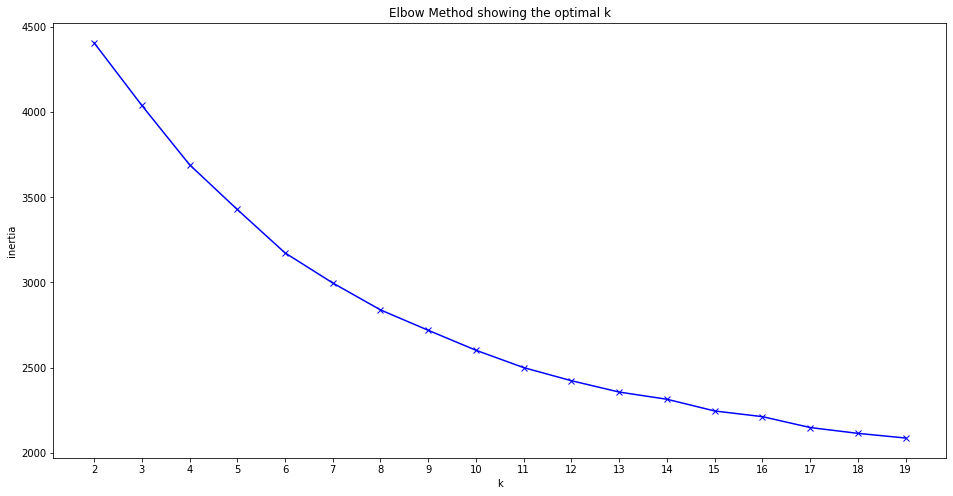

In [74]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

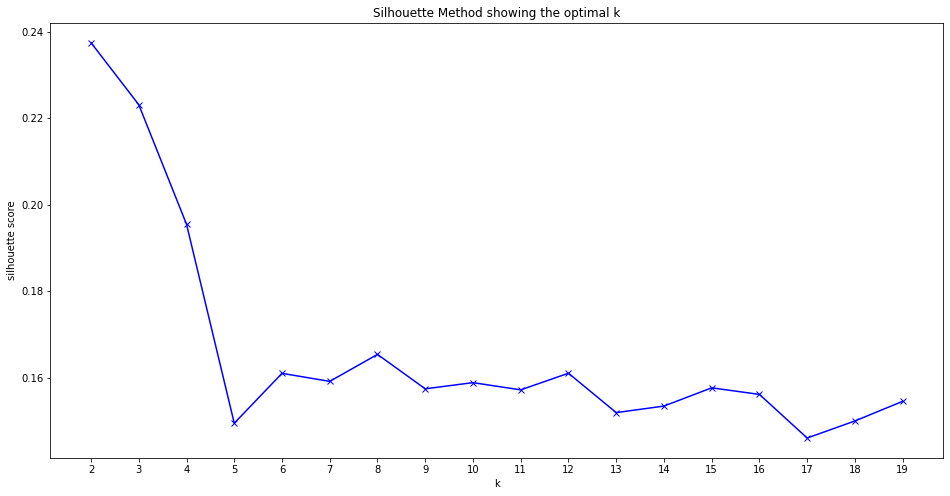

In [75]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [37]:
# 8.08 Continue with Class Example - Clustering and Data Pipeline

In [76]:
X_df = pd.DataFrame(big_df_songs_audiofeat)
X_df["cluster"] = clusters
X_df.head(526)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
id,,,,,,,,,,,,
0D4gIeyrMtxOAvCWsTHN9x,0.382,0.35400,7,-6.595,1,0.0289,0.8580,0.000003,0.1680,0.435,87.018,7
4jep6dMPP0z7HrN375InoL,0.594,0.00544,7,-35.422,1,0.0700,0.9950,0.952000,0.0814,0.314,76.497,2
3lAun9V0YdTlCSIEXPvfsY,0.371,0.27800,7,-8.596,0,0.0303,0.9810,0.000000,0.2720,0.338,82.331,7
4VWbPQUPvLes814r6T11Jz,0.783,0.45400,4,-8.251,1,0.0489,0.4560,0.000000,0.1550,0.711,111.577,0
29GuoJqjg7aMxUmEO3XLEp,0.730,0.44700,10,-11.674,0,0.0555,0.1960,0.005530,0.1130,0.843,124.158,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1qZMPmpD1jDcOA7gZ6TCde,0.733,0.67300,9,-6.572,0,0.0333,0.0132,0.004900,0.1600,0.636,125.061,5
5p1ex0pXv6jSPJ6QbumQpD,0.677,0.74400,10,-6.806,0,0.0295,0.0404,0.000160,0.0740,0.631,124.080,5
4ESPuOrSsRcBISzcMlzmY5,0.717,0.71600,3,-5.485,0,0.0432,0.0421,0.000467,0.0699,0.206,125.064,5


In [ ]:
n_clust

In [81]:
def assign_clusters(features_prep, n_clusters=8):
    
    kmeans = KMeans(n_clusters, random_state = 42)
    kmeans.fit(features_prep)
    
    clusters = kmeans.predict(big_df_songs_audiofeat)
    values = pd.Series(clusters).value_counts().sort_index
    
    X_df = pd.DataFrame(big_df_songs_audiofeat)
    X_df["cluster"] = clusters
    X_df.head()
    
    return X_df, kmeans

assign_clusters(big_df_songs_audiofeat)

(                        danceability   energy  key  loudness  mode  \
 id                                                                   
 0D4gIeyrMtxOAvCWsTHN9x         0.382  0.35400    7    -6.595     1   
 4jep6dMPP0z7HrN375InoL         0.594  0.00544    7   -35.422     1   
 3lAun9V0YdTlCSIEXPvfsY         0.371  0.27800    7    -8.596     0   
 4VWbPQUPvLes814r6T11Jz         0.783  0.45400    4    -8.251     1   
 29GuoJqjg7aMxUmEO3XLEp         0.730  0.44700   10   -11.674     0   
 ...                              ...      ...  ...       ...   ...   
 4ESPuOrSsRcBISzcMlzmY5         0.717  0.71600    3    -5.485     0   
 4aTtHoSBB0CuQGA6vXBNyp         0.466  0.61200    8    -4.855     0   
 6TgLQJ87xq6adrAU6HzaTW         0.544  0.88000    1    -4.917     0   
 3Lv3frZVXU7Q0JEFvLIzWW         0.588  0.69700    3    -4.744     0   
 5N4erncE7kuUccm7zEmwzk         0.588  0.67000    0    -6.439     1   
 
                         speechiness  acousticness  instrumentalness  liven

In [90]:
import random

In [122]:
def song_recomendation():
    
    recomendation = input('Enter your song here: ')

    if songs.song.isin([recomendation]).any() == True:
        sample = random.choice(songs.song)
        print('Hot song! Here is another HOT recomendation: ')
        print('')
        print(sample)
    
    else:
        sample2 = sp.search(q= recomendation, type='track')
        track_id = sample2["tracks"]["items"][0]["id"]
        track_feat = sp.audio_features(track_id)
        
        song_features = pd.DataFrame(track_feat)

    #transform/scale features
        song_features_transformed = StandardScaler().fit_transform(song_features)
    
    #predict cluster
        pcluster = kmeans.predict(song_features_transformed)
        
        #print(pcluster)
    
    #apply the filter (cluster)
        songsDF_filtered = X_df[X_df['cluster'] == pcluster[0]].sample()
        #print(songsDF_filtered.index)
    
    #input randomizer

        x = random.choice(X_df.index)
        print("Your song is not very HOT right now... maybe you'll like this one:")
        #songsDF.loc[x]
        print("Name: {}, Artist: {}".format(songsDF.loc[songsDF_filtered.index][['Name','Artist']].values[0][0],
                                         songsDF.loc[songsDF_filtered.index][['Name','Artist']].values[0][1]))
        print(x)
        songs.Name.loc[x]

In [123]:
song_recomendation()

Enter your song here: Les Champs-Elysées
Hot song! Here is another HOT recomendation: 

Hey
